# Regression on MCR & MT Data

29 - 01 - 2023 | reg_mcr_mt

Data

In [31]:
import pandas as pd
import numpy as np
df  = pd.read_csv("dataset-mcr-rt-180000.csv")
dataset = df.values
print('Total number of rows:', df.shape[0]) #940520
X = dataset[:, 6] # rt column
print(np.min(X)," ",np.max(X))
Y = dataset[:, 5] # mcr column
print(np.min(Y)," ",np.max(Y))

Total number of rows: 179996
0.01   5858.833333333333
0.0253444780071999   4874.2


Correlation

In [32]:
from scipy.stats import pearsonr

corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.752


Scatter

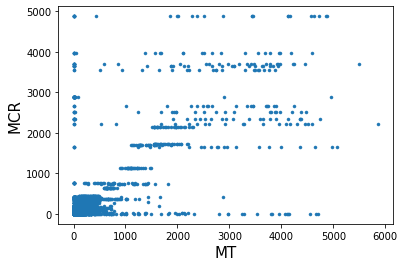

In [33]:
import matplotlib.pyplot as plt
plt.scatter(x=X, y=Y, marker=".", linewidth=0.5)
#plt.title('Data')
plt.ylabel('MCR', fontsize=15)
plt.xlabel('MT', fontsize=15)
plt.show()

Reshape + Split

In [34]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

Linear Regression + Predict + Plot ( Before Preprocessing )

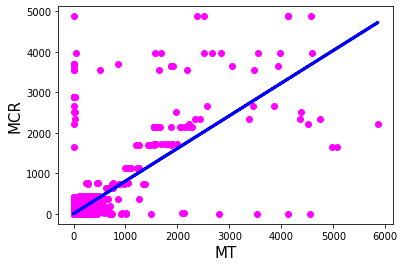

In [35]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

# prediction
Y_predict = reg.predict(X_test)
# plot (before preprocessing)
plt.scatter(x=X_test, y=Y_test, color="magenta")
plt.plot(X_test, Y_predict, color="blue", linewidth=3)  
#plt.title('Comparison between actual and predicted')
plt.ylabel('MCR', fontsize=15)
plt.xlabel('MT', fontsize=15)
plt.show()

Error ( Before Preprocessing )

In [36]:
from sklearn.metrics import mean_absolute_error
print("MAE before preprocessing : ", mean_absolute_error(Y_test, Y_predict))

MAE before preprocessing :  12.844822381919817


Preprocessing

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, Normalizer

pipe = make_pipeline(PolynomialFeatures(), linear_model.LinearRegression())
pipe.fit(X_train, Y_train)
Y_predict = pipe.predict(X_test)

Plot ( After Preprocessing )

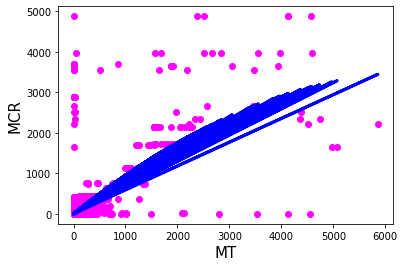

In [38]:
# plot (after preprocessing)
plt.scatter(x=X_test, y=Y_test, color="magenta")
plt.plot(X_test, Y_predict, color="blue", linewidth=3)  
#plt.title('Comparison between actual and predicted')
plt.ylabel('MCR', fontsize=15)
plt.xlabel('MT', fontsize=15)
plt.show()

Error ( After Preprocessing )

In [39]:
print("MAE after preprocessing : ", mean_absolute_error(Y_test, Y_predict))

MAE after preprocessing :  10.251984805173867


Graph

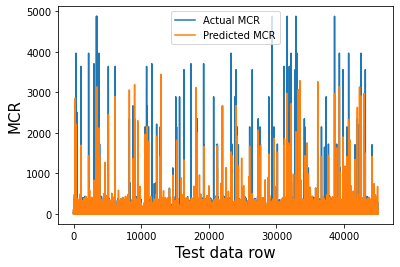

In [40]:
plt.plot(Y_test, label='Actual MCR')  # actual plot
plt.plot(Y_predict, label='Predicted MCR')  # predicted plot
#plt.title('Comparison')
plt.ylabel('MCR', fontsize=15)
plt.xlabel('Test data row', fontsize=15)
plt.legend()
plt.show()